In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
col_names=['buying','maint','doors','persons','tug_boot','safety','class']

In [3]:
data=pd.read_csv("data/car_evaluation.csv",names=col_names)

In [4]:
data.head()

,buying,maint,doors,persons,tug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   tug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
for i in data.columns:
    print(data[i].unique(),"\t",data[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [7]:
for i in data.columns:
    print(data[i].value_counts())
    print()

high     432
vhigh    432
low      432
med      432
Name: buying, dtype: int64

high     432
vhigh    432
low      432
med      432
Name: maint, dtype: int64

2        432
5more    432
4        432
3        432
Name: doors, dtype: int64

2       576
more    576
4       576
Name: persons, dtype: int64

big      576
small    576
med      576
Name: tug_boot, dtype: int64

high    576
low     576
med     576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



C:\Users\akshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

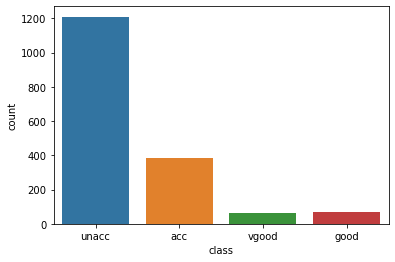

In [8]:
sns.countplot(data['class'])

C:\Users\akshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\akshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\akshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\akshi\anaconda3\lib\si

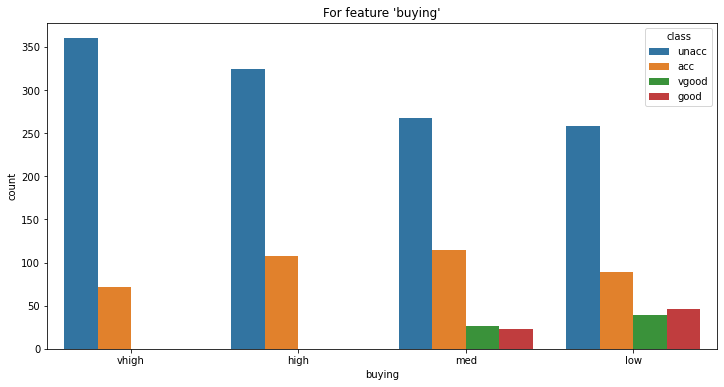

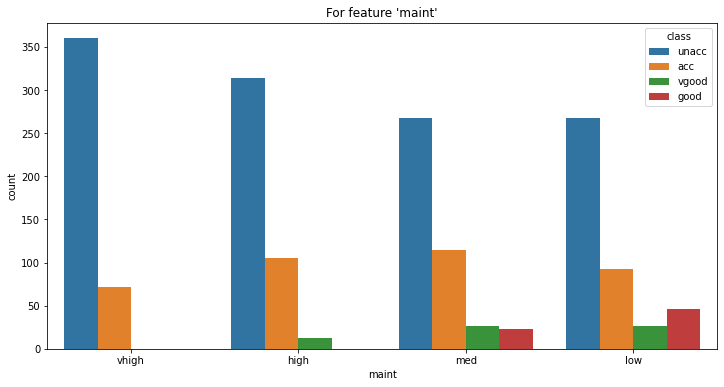

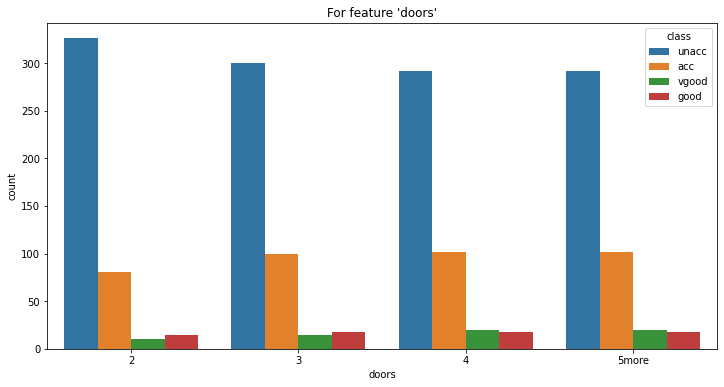

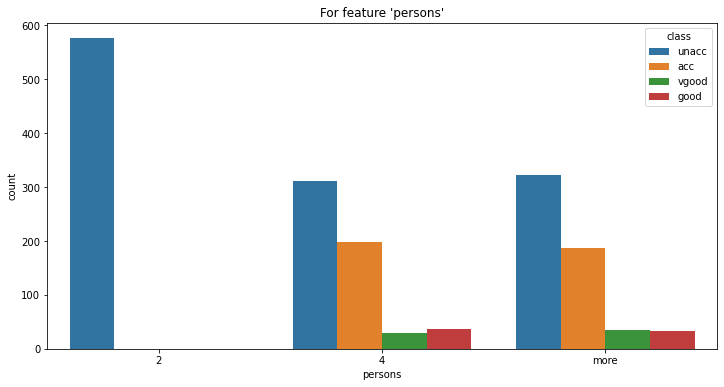

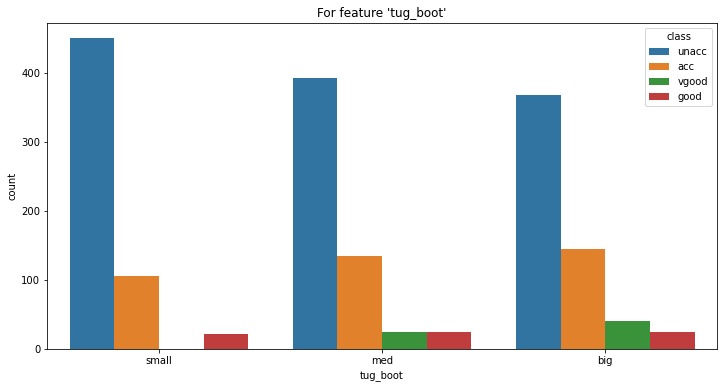

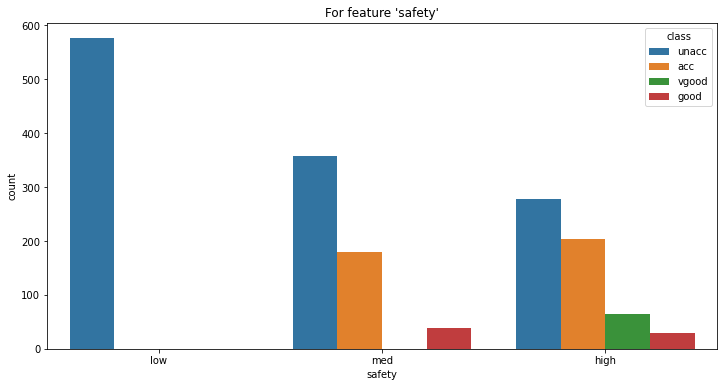

In [9]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['class'])

In [10]:
data.isna().sum()

buying      0
maint       0
doors       0
persons     0
tug_boot    0
safety      0
class       0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()

In [13]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [14]:
data.head()


,buying,maint,doors,persons,tug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


<AxesSubplot:>

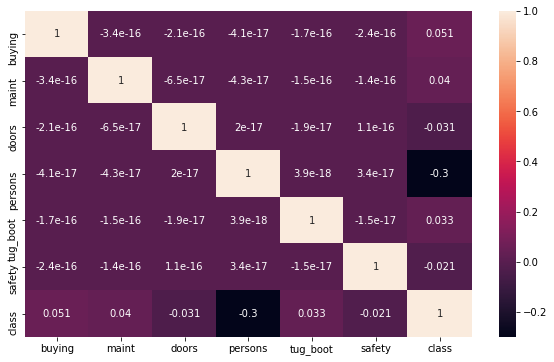

In [15]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [16]:
X=data[data.columns[:-1]]
y=data['class']

In [17]:
X.head(2)


,buying,maint,doors,persons,tug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [20]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
X_train.head()

,buying,maint,doors,persons,tug_boot,safety
1178,2,2,3,1,0,0
585,0,0,1,2,2,1
1552,1,2,1,1,1,2
1169,2,2,3,0,0,0
1033,2,0,2,0,0,2


In [23]:
X_test.head()

,buying,maint,doors,persons,tug_boot,safety
599,0,0,2,0,1,0
1201,2,1,0,1,1,2
628,0,0,3,0,0,2
1498,1,0,3,1,1,2
1263,2,1,2,2,1,1


In [24]:
y_train.head()

1178    3
585     2
1552    0
1169    2
1033    2
Name: class, dtype: int32

In [25]:
logreg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [26]:
y_test.head()

599     2
1201    0
628     2
1498    0
1263    2
Name: class, dtype: int32

In [27]:
pred=logreg.predict(X_test)

In [28]:
logreg.score(X_test,y_test)

0.6647398843930635

In [29]:
from sklearn.model_selection import learning_curve  

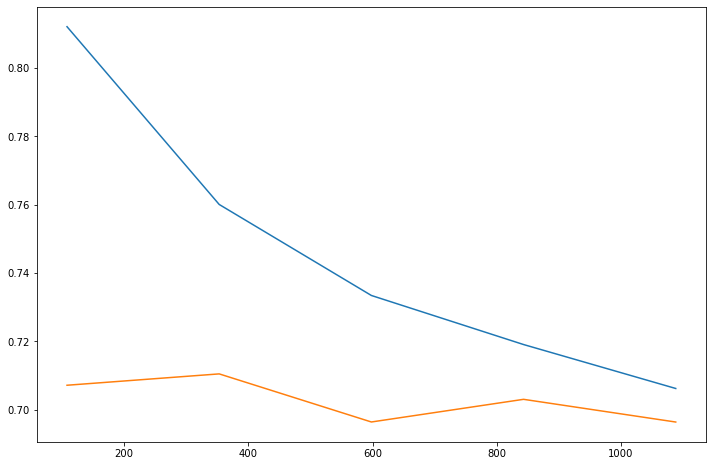

In [30]:
lc=learning_curve(logreg,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

In [31]:
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
param_range=[0.0001,0.001,0.1,1]
curve=validation_curve(logreg,X_train,y_train,cv=5,param_name='C',
    param_range=param_range,n_jobs=-1,)

In [32]:
curve

(array([[0.70527404, 0.70423992, 0.70423992, 0.70527404, 0.70454545],
        [0.70527404, 0.70423992, 0.70423992, 0.70527404, 0.70454545],
        [0.70837642, 0.71768356, 0.70837642, 0.71354705, 0.7107438 ],
        [0.70527404, 0.71251293, 0.70630817, 0.70527404, 0.70764463]]),
 array([[0.70247934, 0.70661157, 0.70661157, 0.70247934, 0.70539419],
        [0.70247934, 0.70661157, 0.70661157, 0.70247934, 0.70539419],
        [0.73966942, 0.67355372, 0.7107438 , 0.70661157, 0.70124481],
        [0.70247934, 0.66942149, 0.70661157, 0.7107438 , 0.70539419]]))

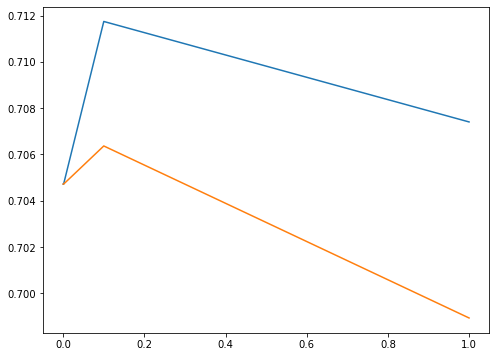

In [33]:
n=len(param_range)
train_score=[curve[0][i].mean() for i in range (0,n)]
test_score=[curve[1][i].mean() for i in range (0,n)]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

In [34]:
param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)

In [35]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']})

In [36]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.01, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.7096807379719489


In [37]:
knn=KNeighborsClassifier(n_jobs=-1)

In [38]:
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.9017341040462428

In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       118
           1       0.77      0.53      0.62        19
           2       0.93      0.99      0.96       358
           3       1.00      0.50      0.67        24

    accuracy                           0.90       519
   macro avg       0.88      0.70      0.76       519
weighted avg       0.90      0.90      0.90       519



In [40]:
avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

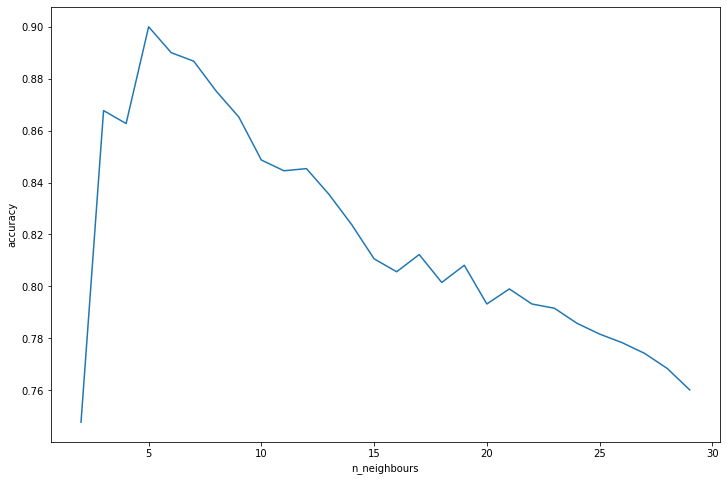

In [41]:
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
#plt.xticks(range(2,30,2))

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [44]:
from sklearn.metrics import f1_score

In [45]:
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))
print(f1_score(y_test,rfc.predict(X_test),average='macro'))

0.9730250481695568
0.9245337130459484


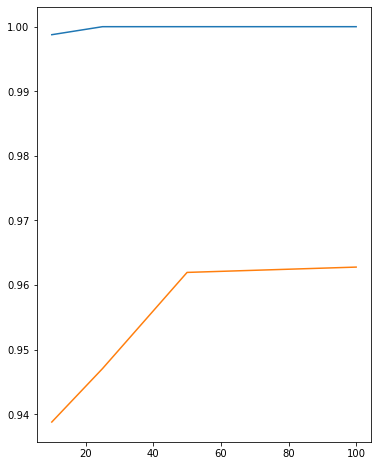

In [46]:
param_range=[10,25,50,100]
curve=validation_curve(rfc,X_train,y_train,cv=5,param_name='n_estimators',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

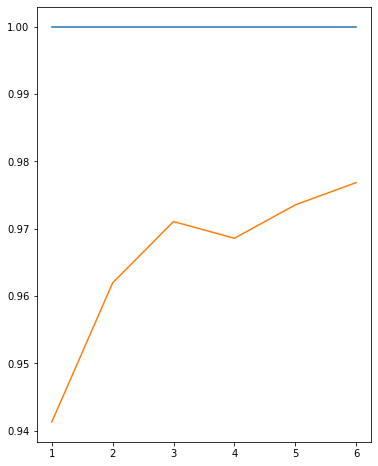

In [47]:
param_range=range(1,len(X.columns)+1)
curve=validation_curve(RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),X_train,y_train,cv=5,
    param_name='max_features',param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

In [48]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}

In [49]:
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [50]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                              random_state=51),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20],
                         'max_features': [2, 4, 6, 'auto'],
                         'max_leaf_nodes': [2, 3, None]})

In [51]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'max_leaf_nodes': None}
0.9826170798898073


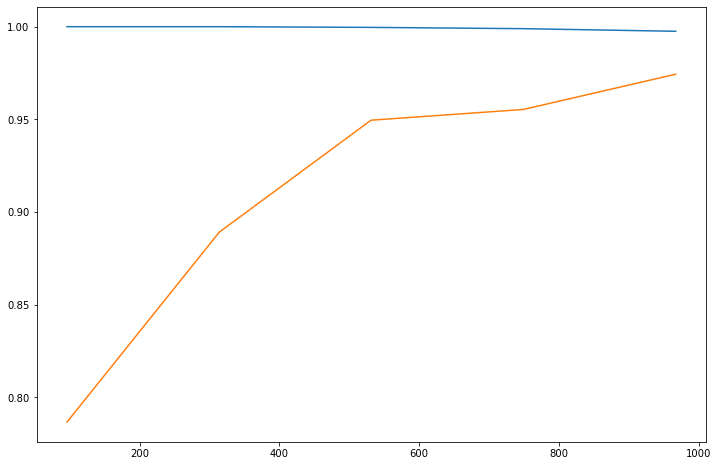

In [52]:
lc=learning_curve(RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=6,max_depth=10,random_state=51,
                                             max_leaf_nodes=None,n_jobs=-1,),X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

In [53]:
print(X.columns)
print(rfc.feature_importances_)

Index(['buying', 'maint', 'doors', 'persons', 'tug_boot', 'safety'], dtype='object')
[0.1906157  0.16642232 0.06901749 0.22867226 0.0879754  0.25729683]


In [54]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X[['buying', 'maint', 'persons', 'tug_boot', 'safety']],
    y, test_size=0.3, random_state=42)

In [55]:
rfc1=RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=5,max_depth=10,random_state=51,
    max_leaf_nodes=None,n_jobs=-1)
rfc1.fit(X_train1,y_train1)
rfc1.score(X_test1,y_test1)

0.9364161849710982

Conclusion
Random Forest Classifier is the best suitable model for this data with following parameters: n_estimators: 50 criterion: entropy max_depth: 10 max_features: 6 max_leaf_nodes: None

We are able to achieve 98.43% accuracy with this model

In [56]:
y_pred=rfc1.predict(X_test1)

In [57]:
print(y_pred)

[2 1 2 0 2 0 2 2 2 2 3 1 0 2 2 2 2 2 2 0 2 0 0 2 0 2 2 2 2 2 0 2 2 2 0 1 1
 2 2 2 2 2 0 0 1 3 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 0 2 2 0 3 2 0 0 2 2 2 2 2
 3 3 2 2 2 2 3 2 2 0 3 0 2 0 3 0 2 1 2 2 2 1 2 2 2 0 2 2 2 2 1 1 0 2 2 0 2
 2 2 2 2 0 3 2 2 2 2 3 2 0 0 2 1 2 2 2 2 2 1 2 2 0 2 3 2 2 2 0 0 0 2 0 2 2
 2 2 1 3 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 0 3 0 2 0 2 2 0 2 2 2 2 0 2 2 2 1
 0 2 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 2 1 2 2 2 1 2 0 2 2 0 2 2 1 2 2 2 3 3 2
 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 0 2 2 2 2 2 0 3 2 2 2 0 2 2 3 2 2 1 1 2 0 2 0 0 2 2 2 1 1 0 0 2 2 2 2 3
 0 0 2 2 2 2 3 2 2 2 2 0 2 2 3 0 0 2 2 0 0 0 2 0 0 2 2 2 2 2 2 0 2 2 2 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 3 2 2 2 2 0 2 0 0 2 2 0
 2 0 1 3 2 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 1 2 2 2 2 2 2 0 2
 2 3 2 0 2 2 0 0 2 3 2 0 2 1 2 0 0 2 2 0 2 0 2 1 2 2 2 0 0 0 0 2 0 2 0 2 2
 0 1 2 0 0 0 2 3 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 0 2 2 1 2 2
 2 2 0 2 0 2 2 2 2 2 2 2 

In [58]:
print(X_test1)


      buying  maint  persons  tug_boot  safety
599        0      0        0         1       0
1201       2      1        1         1       2
628        0      0        0         0       2
1498       1      0        1         1       2
1263       2      1        2         1       1
...      ...    ...      ...       ...     ...
490        0      3        0         1       2
1277       2      1        0         0       0
287        3      2        1         0       0
1639       1      1        2         2       2
1714       1      1        1         1       2

[519 rows x 5 columns]


In [59]:
print(y_test1)

599     2
1201    0
628     2
1498    0
1263    2
       ..
490     2
1277    2
287     0
1639    2
1714    1
Name: class, Length: 519, dtype: int32
